## Load neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

## Create dataset

In [2]:
# predict variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
        'False', 'False', 'False', 'True', 'True', 'False', 'True']

# class label
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 
        'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

## Encode the features using one-hot encoding.

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

data = tuple(zip(Outlook, Temperature, Humidity, Wind))
print(f"Data:- \n{data}\n")

# Encode the features
X_enc = OneHotEncoder().fit_transform(data).toarray()
print(f"Encoder:- \n{X_enc}")

# Encode the class label
lbl = LabelEncoder()
Y_enc = lbl.fit_transform(Play)

Data:- 
(('Rainy', 'Hot', 'High', 'False'), ('Rainy', 'Hot', 'High', 'True'), ('Overcast', 'Hot', 'High', 'False'), ('Sunny', 'Mild', 'High', 'False'), ('Sunny', 'Cool', 'Normal', 'False'), ('Sunny', 'Cool', 'Normal', 'True'), ('Overcast', 'Cool', 'Normal', 'True'), ('Rainy', 'Mild', 'High', 'False'), ('Rainy', 'Cool', 'Normal', 'False'), ('Sunny', 'Mild', 'Normal', 'False'), ('Rainy', 'Mild', 'Normal', 'True'), ('Overcast', 'Mild', 'High', 'True'), ('Overcast', 'Hot', 'Normal', 'False'), ('Sunny', 'Mild', 'High', 'True'))

Encoder:- 
[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1

## Create and create Decision Tree Classifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Use test_size as 25%
# random state = roll no = 88
X_train, X_test, Y_train, Y_test = train_test_split(X_enc, Y_enc, test_size=0.25, random_state=88)
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, Y_train)

# Predict Output
Y_predict = dtc.predict(X_test)
print(f"Accuracy:-\t{metrics.accuracy_score(Y_test, Y_predict)}")
print(f"\nX test:-\n{X_test}\n")
print(f"Y predicted:-\t{Y_predict}")
print(f"Actual Y test:-\t{Y_test}")

Accuracy:-	0.75

X test:-
[[0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]]

Y predicted:-	[0 1 1 1]
Actual Y test:-	[0 1 0 1]


## Classification Report

In [5]:
print(metrics.classification_report(Y_test, Y_predict, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



## Confusion Matrix

Confusion Matrix:- 
[[1 1]
 [0 2]]



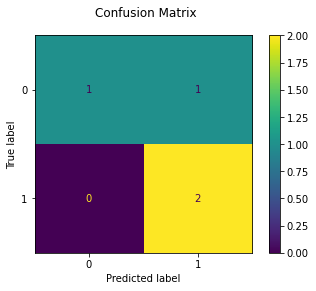

In [6]:
from sklearn.metrics import confusion_matrix

print(f"Confusion Matrix:- \n{confusion_matrix(Y_test, Y_predict)}\n")

fig = metrics.plot_confusion_matrix(dtc, X_test, Y_test)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

## Create Decision Tree

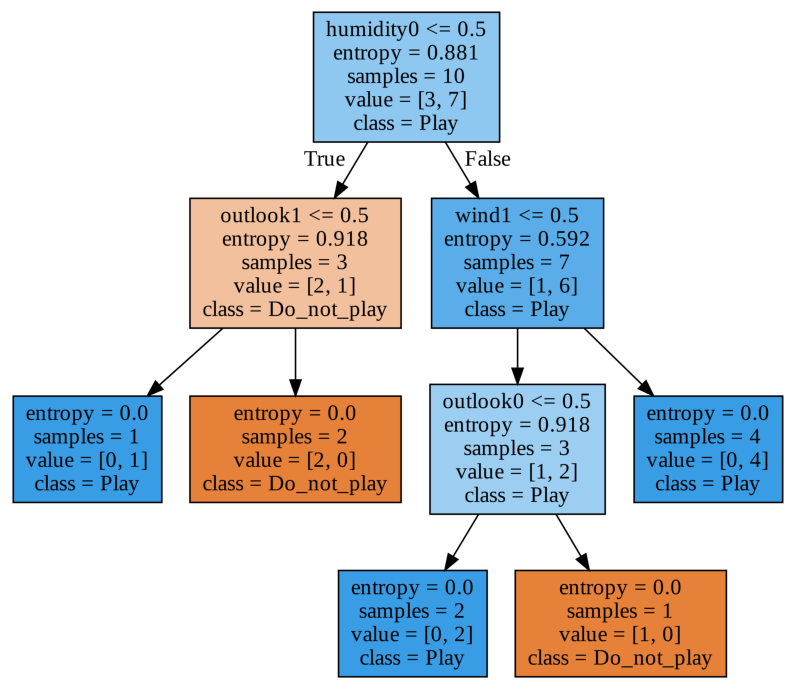

In [7]:
from subprocess import call

export_graphviz(dtc, out_file='tree_entropy.dot', 
                feature_names=['outlook2','outlook1','outlook0','temperature2','temperature1','temperature0','humidity1','humidity0','wind1','wind0'], 
                class_names=['Do_not_play','Play'], 
                filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display
plt.figure(figsize = (14, 14))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();